In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
# Retina
# %config InlineBackend.figure_format = 'retina'

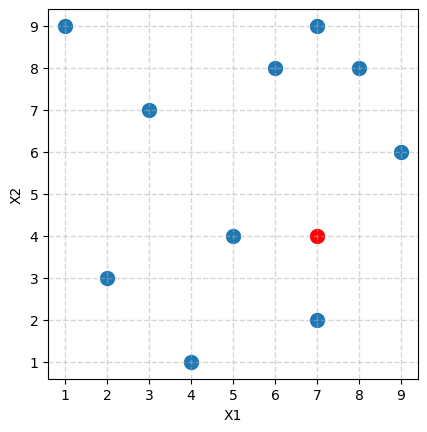

In [ ]:
X = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])

query_pt = np.array([7, 4])

def plot_dataset():
    plt.scatter(X[:, 0], X[:, 1], s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
    plt.xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
    plt.yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))

    plt.scatter(query_pt[0], query_pt[1], color='red', s=100)


plot_dataset()



In [ ]:
from sklearn.neighbors import NearestNeighbors

k = 2
nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(X)
distances, indices = nbrs.kneighbors([query_pt])

In [ ]:
nbrs = NearestNeighbors(n_neighbors=len(X), algorithm='brute').fit(X)
distances_sklearn, idxs_sklearn = nbrs.kneighbors([query_pt])
print(distances_sklearn)

[[2.         2.         2.82842712 4.12310563 4.12310563 4.24264069
  5.         5.         5.09901951 7.81024968]]


In [ ]:
import pandas as pd

df = pd.DataFrame(X, columns=['X1', 'X2'])
df["query_distance"] = distances_sklearn[0, idxs_sklearn[0]]
df

,X1,X2,query_distance
0,1,9,4.123106
1,2,3,5.000000
2,4,1,7.810250
3,3,7,4.242641
4,5,4,5.000000
5,6,8,2.828427
6,7,2,4.123106
7,8,8,5.099020
8,7,9,2.000000
9,9,6,2.000000


In [ ]:
def generate_dataset(n, d):
    X = np.random.randint(0, 100, size=(n, d))
    return X

n = 1000  
d = 20    
X_train = generate_dataset(n, d)
print(X_train)

[[78 70 13 ... 11 49 36]
 [21 18 43 ...  1 42 13]
 [29 16  7 ... 91 94 46]
 ...
 [76 31 90 ... 52 85  7]
 [ 6 36 66 ... 76 64 34]
 [49 78 62 ... 26 30 46]]


In [ ]:
X_test = generate_dataset(1, d)

In [ ]:
from sklearn.datasets import make_blobs

def create_clusters(k, n, d, cluster_std=1.0):
    data, labels = make_blobs(n_samples=n*k, n_features=d, centers=k, cluster_std=cluster_std, random_state=42)
    return data, labels

In [ ]:
k = 3
n = 10
d = 2
cluster_std = 1.0

X_train, y_train = create_clusters(k, n, d, cluster_std)

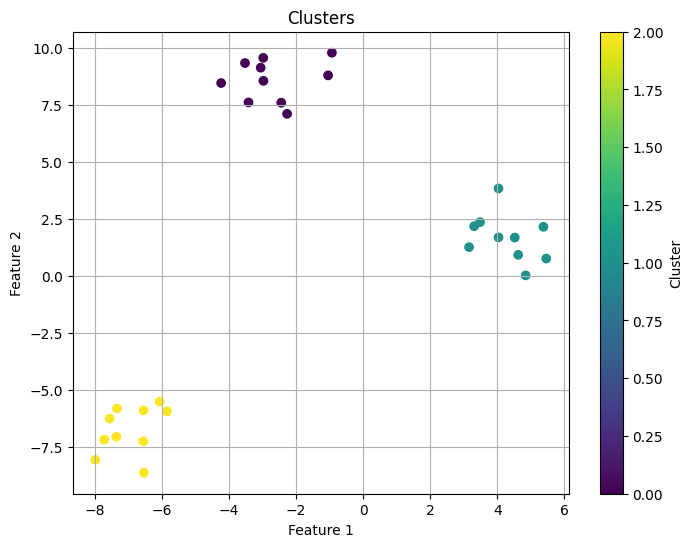

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
def k_nearest_neighbors_with_indices(X_train, X_test, k):
    """
    Implement k-nearest neighbors algorithm and output indices of k nearest neighbors.

    Parameters:
        X_train (numpy.ndarray): Training data features with shape (n_train, d).
        X_test (numpy.ndarray): Test data features with shape (n_test, d).
        k (int): Number of nearest neighbors to consider.

    Returns:
        List of numpy.ndarray: Indices of k nearest neighbors for each test data point.
    """
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    neighbor_indices = []

    for i in range(n_test):
        distances = np.linalg.norm(X_train - X_test[i], axis=1)  
        nearest_indices = distances.argsort()[:k]  
        neighbor_indices.append(nearest_indices)

    return neighbor_indices

In [ ]:
x_test = [2,2]
x_test = np.array(x_test)
k = 10

In [ ]:
y_pred_naive_self = k_nearest_neighbors_with_indices(X_train, x_test, k)
print(y_pred_naive_self)
print(X_train[y_pred_naive_self])

[array([15,  1,  2, 12, 10,  3, 23,  6, 13, 24]), array([15,  1,  2, 12, 10,  3, 23,  6, 13, 24])]
[[[3.31169279 2.17003092]
  [3.16135685 1.25332548]
  [3.48888526 2.3488677 ]
  [4.03924015 1.68147593]
  [4.52423055 1.67206599]
  [4.03817222 3.82544787]
  [4.62638161 0.91545875]
  [5.37834542 2.14453797]
  [4.84874243 0.01349956]
  [5.46242375 0.75232603]]

 [[3.31169279 2.17003092]
  [3.16135685 1.25332548]
  [3.48888526 2.3488677 ]
  [4.03924015 1.68147593]
  [4.52423055 1.67206599]
  [4.03817222 3.82544787]
  [4.62638161 0.91545875]
  [5.37834542 2.14453797]
  [4.84874243 0.01349956]
  [5.46242375 0.75232603]]]


In [ ]:
k = 10
nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(X_train)
distances, indices = nbrs.kneighbors([x_test])
print(indices)
knn = X_train[indices]
knn = knn.reshape(10,2)
knn = knn[knn[:, 0].argsort()]
print(knn)

[[15  1  2 12 10  3 23  6 13 24]]
[[3.16135685 1.25332548]
 [3.31169279 2.17003092]
 [3.48888526 2.3488677 ]
 [4.03817222 3.82544787]
 [4.03924015 1.68147593]
 [4.52423055 1.67206599]
 [4.62638161 0.91545875]
 [4.84874243 0.01349956]
 [5.37834542 2.14453797]
 [5.46242375 0.75232603]]


In [ ]:
k = 10
nbrs = NearestNeighbors(n_neighbors=k, algorithm='kd_tree').fit(X_train)
distances, indices = nbrs.kneighbors([x_test])
print(indices)
print(X_train[indices])

[[15  1  2 12 10  3 23  6 13 24]]
[[[3.31169279 2.17003092]
  [3.16135685 1.25332548]
  [3.48888526 2.3488677 ]
  [4.03924015 1.68147593]
  [4.52423055 1.67206599]
  [4.03817222 3.82544787]
  [4.62638161 0.91545875]
  [5.37834542 2.14453797]
  [4.84874243 0.01349956]
  [5.46242375 0.75232603]]]


##  KD tree

In [ ]:
class KDNode:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right

def build_kdtree(points, depth=0):
    if len(points) < 1:
        return None

    k = len(points[0])  
    axis = depth % k
    sorted_points = sorted(points, key=lambda x: x[axis])
    median_index = len(sorted_points) // 2

    return KDNode(
        point=sorted_points[median_index],
        left=build_kdtree(sorted_points[:median_index], depth + 1),
        right=build_kdtree(sorted_points[median_index + 1:], depth + 1)
    )

def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def nearest_neighbors_kdtree(root, query_point, k):
    def _nearest_neighbors(node, depth=0):
        if node is None:
            return []

        axis = depth % len(query_point)
        if query_point[axis] < node.point[axis]:
            next_node = node.left
            opposite_node = node.right
        else:
            next_node = node.right
            opposite_node = node.left

        best = _nearest_neighbors(next_node, depth + 1)
        if len(best) < k or distance(query_point, node.point) < distance(query_point, best[-1]):
            best.append(node.point)
            best.sort(key=lambda x: distance(query_point, x))
            best = best[:k]

        if (query_point[axis] - node.point[axis]) ** 2 < distance(query_point, best[-1]) or len(best) < k:
            best.extend(_nearest_neighbors(opposite_node, depth + 1))
            best.sort(key=lambda x: distance(query_point, x))
            best = best[:k]

        return best

    return _nearest_neighbors(root)

In [ ]:
! pip install binarytree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
from math import floor
from binarytree import tree, Node

class MyNode(Node):
  def __init__(self,_id,data,axis,idx,id,objects):
    super().__init__(_id)
    self.id = id
    self.objects = objects
    self.data = data
    self.axis = axis
    self.idx = idx

class KD_Tree:
  def __init__(self, leaf_size=10):
    self.data = None
    self.tree = None
    self.leaf_size = leaf_size

  def distance(self,q1, q2):
    return np.linalg.norm(q1-q2)
  def _build(self,points,depth):
    k = len(points.columns)
    _axis = depth % k
    _column = points.columns[_axis]

    if len(points)<self.leaf_size:
      return None

    objects_list = points.sort_values(by = [_column], ascending = True)

    if len(objects_list)%2 == 0:
      median_idx = int((len(objects_list)/2))
    else:
      median_idx = floor(len(objects_list)/2)
    node = MyNode(_id = round(objects_list.iloc[median_idx][_column],3),
                  data = objects_list.iloc[median_idx],
                  axis = _column,
                  idx = median_idx,
                  id = round(objects_list.iloc[median_idx][_column],3),
                  objects = objects_list)
    node.left = self._build(objects_list.iloc[0:median_idx],depth+1)
    node.right = self._build(objects_list.iloc[median_idx+1:],depth+1)

    return node
  def build(self, data):
    test_df = pd.DataFrame(data)
    self.data = test_df
    self.tree = self._build(self.data,depth = 0)

  def _nearest(self,query,node,best_node,best_distance):
    if not node:
      return best_node, best_distance
    d = self.distance(query.values[0],node.data.values)
    if d<best_distance:
      best_node = node
      best_distance = d
    if query[node.axis].values[0]<node.data[node.axis]:
      good_side = node.left
      bad_side = node.right
    else:
      bad_side = node.left
      good_side = node.right
    best_node, best_distance = self._nearest(query,good_side, best_node, best_distance)
    if abs(node.data[node.axis]-query[node.axis].values[0])<best_distance :
      best_node, best_distance = self._nearest(query,bad_side, best_node, best_distance)
    return best_node, best_distance

  def get_nn(self,query):
    query = pd.DataFrame([query], columns = self.data.columns)
    return self._nearest(query,self.tree, None, np.inf)
  def kneighbors(self,queries,k):
    X = np.array(self.data)
    distances = []
    indices = []
    for query in queries:
      candidates = np.array(kdtree.get_nn(query)[0].objects.index)
      distances_indices = [(np.linalg.norm(query - X[j]), j) for j in candidates]
      distances_indices.sort()
      while len(distances_indices) < k:
          distances_indices.append((np.nan, np.nan))
      distances.append([dist for dist, _ in distances_indices[:k]])
      indices.append([idx for _, idx in distances_indices[:k]])

    return distances, indices

In [ ]:
kdtree = KD_Tree(leaf_size = 10)
kdtree.build(X_train)

In [ ]:
print(kdtree.tree)


    ___-2.973_
   /          \
-5.905        2.17



In [ ]:
print(x_test)
print(type(x_test))
print(x_test.shape)

[2 2]
<class 'numpy.ndarray'>
(2,)


In [ ]:
root = build_kdtree(X_train)
y_pred_kd_self = nearest_neighbors_kdtree(root, x_test, k)

In [ ]:
print(len(y_pred_kd_self))
print(type(y_pred_kd_self[0]))
values = []
for i in range(len(y_pred_kd_self)):
  values.append(y_pred_kd_self[i])
values = np.array(values)

10
<class 'numpy.ndarray'>


In [ ]:
print(values)
print(values.shape)

[[3.31169279 2.17003092]
 [3.16135685 1.25332548]
 [3.48888526 2.3488677 ]
 [4.03924015 1.68147593]
 [4.52423055 1.67206599]
 [4.03817222 3.82544787]
 [4.62638161 0.91545875]
 [5.37834542 2.14453797]
 [4.84874243 0.01349956]
 [5.46242375 0.75232603]]
(10, 2)


In [ ]:
def count_kd(knn, kdtree):
    knn = knn[knn[:, 0].argsort()]
    kdtree = kdtree[kdtree[:, 0].argsort()]
    count = 0
    for i in knn:
        if i in kdtree:
            count += 1

    return count

In [ ]:
number = count_kd(knn, values)
print(number)

10


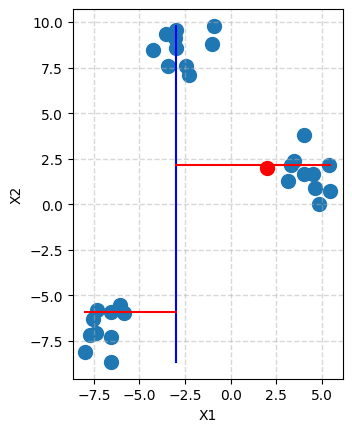

In [ ]:
class Node:
    def __init__(self, point, split_dim, left=None, right=None):
        self.point = point
        self.split_dim = split_dim
        self.left = left
        self.right = right

def build_kd_tree(points, depth=0):
    if len(points) < 10:
        return None

    split_dim = depth % 2

    points.sort(key=lambda x: x[split_dim])
    median_idx = len(points) // 2
    node = Node(points[median_idx], split_dim)

    node.left = build_kd_tree(points[:median_idx], depth + 1)
    node.right = build_kd_tree(points[median_idx + 1:], depth + 1)

    return node

def plot_kd_tree(node, xmin, xmax, ymin, ymax, depth=0):
    if node is None:
        return

    if node.split_dim == 0:  
        plt.plot([node.point[0], node.point[0]], [ymin, ymax], color='b')
    else:  
        plt.plot([xmin, xmax], [node.point[1], node.point[1]], color='r')

    if node.left:
        if node.split_dim == 0:
            plot_kd_tree(node.left, xmin, node.point[0], ymin, ymax, depth + 1)
        else:
            plot_kd_tree(node.left, xmin, xmax, ymin, node.point[1], depth + 1)
    if node.right:
        if node.split_dim == 0:
            plot_kd_tree(node.right, node.point[0], xmax, ymin, ymax, depth + 1)
        else:
            plot_kd_tree(node.right, xmin, xmax, node.point[1], ymax, depth + 1)


query_pt = np.array([2,2])

root = build_kd_tree(X_train.tolist())  
plt.scatter(X_train[:,0], X_train[:,1], s=100)  

plt.xlabel('X1')
plt.ylabel('X2')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
plt.scatter(query_pt[0], query_pt[1], color='red', s=100)

plot_kd_tree(root, X_train[:,0].min(), X_train[:,0].max(), X_train[:,1].min(), X_train[:,1].max())  
plt.show()

In [ ]:
x_test = [-2, -7]
x_test = np.array(x_test)

In [ ]:
k = 10
nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(X_train)
distances, indices = nbrs.kneighbors([x_test])

print(indices)

knn = X_train[indices]
knn = knn.reshape(10,2)
knn = knn[knn[:, 0].argsort()]
print(knn)

[[16 22 11 29  9 21  7 19 20 26]]
[[-7.98596217 -8.07631622]
 [-7.71884471 -7.18932197]
 [-7.55654919 -6.2684333 ]
 [-7.35880143 -7.06576857]
 [-7.34026596 -5.82298737]
 [-6.55554322 -7.26519187]
 [-6.54836376 -5.90456447]
 [-6.5360089  -8.64314975]
 [-6.06710137 -5.52386956]
 [-5.84862767 -5.94882947]]


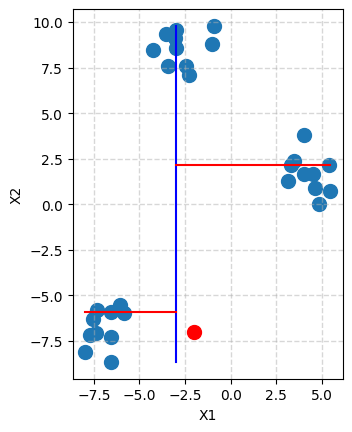

In [ ]:
query_pt = np.array([-2,-7])

root = build_kd_tree(X_train.tolist())  
plt.scatter(X_train[:,0], X_train[:,1], s=100)  

plt.xlabel('X1')
plt.ylabel('X2')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)


plt.scatter(query_pt[0], query_pt[1], color='red', s=100)

plot_kd_tree(root, X_train[:,0].min(), X_train[:,0].max(), X_train[:,1].min(), X_train[:,1].max())  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

class Node:
    def __init__(self, point, split_dim, left=None, right=None):
        self.point = point
        self.split_dim = split_dim
        self.left = left
        self.right = right

def build_kd_tree(points, depth=0):
    if len(points) < 1:
        return None

    k = len(points[0])
    split_dim = depth % k
    points = sorted(points, key=lambda x: x[split_dim])
    median_idx = len(points) // 2

    return Node(
        point=points[median_idx],
        split_dim=split_dim,
        left=build_kd_tree(points[:median_idx], depth + 1),
        right=build_kd_tree(points[median_idx + 1:], depth + 1)
    )

def distance(point1, point2):
    return np.sqrt(np.sum(np.square(point1 - point2)))

def nearest_neighbors_from_leaf(node, query_pt, k, neighbors=None):
    if neighbors is None:
        neighbors = []

    if node is None:
        return

    if node.left is None and node.right is None:
        neighbors.append(node.point)
        return neighbors

    split_dim = node.split_dim

    if query_pt[split_dim] < node.point[split_dim]:
        nearest_neighbors_from_leaf(node.left, query_pt, k, neighbors)
    else:
        nearest_neighbors_from_leaf(node.right, query_pt, k, neighbors)

    if abs(query_pt[split_dim] - node.point[split_dim]) < distance(query_pt, neighbors[-1]):
        if query_pt[split_dim] < node.point[split_dim]:
            nearest_neighbors_from_leaf(node.right, query_pt, k, neighbors)
        else:
            nearest_neighbors_from_leaf(node.left, query_pt, k, neighbors)

    return heapq.nsmallest(k, neighbors, key=lambda x: distance(x, query_pt))
points = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])
query_pt = np.array([-2, -7])

root = build_kd_tree(X_train)
nn = nearest_neighbors_from_leaf(root, query_pt, k=10)
print(len(nn))
print(type(nn[0]))
values = []
for i in range(len(nn)):
  values.append(nn[i])
values = np.array(values)
values = values[values[:, 0].argsort()[::-1]]
print(values[0:5])

root = build_kd_tree(X_train)
nearest_neighbors = nearest_neighbors_from_leaf(root, query_pt, k=10)
nearest_neighbors_sorted = sorted(nearest_neighbors, key=lambda x: distance(x, query_pt), reverse=True)

10
<class 'numpy.ndarray'>
[[5.37834542 2.14453797]
 [4.84874243 0.01349956]
 [4.03924015 1.68147593]
 [3.48888526 2.3488677 ]
 [3.16135685 1.25332548]]


In [ ]:
import sys

def memory_usage_np_array(array):
    return array.size * array.itemsize

def memory_usage_kdnode(node):
    if node is None:
        return 0
    return memory_usage_np_array(node.point) + sys.getsizeof(node.left) + sys.getsizeof(node.right)

def memory_usage_kdtree(node):
    if node is None:
        return 0
    return memory_usage_kdnode(node) + memory_usage_kdtree(node.left) + memory_usage_kdtree(node.right)

In [ ]:
total_memory_usage = memory_usage_kdtree(root)
print(f"{total_memory_usage} bytes")

2368 bytes


In [ ]:
x_test = [2, 2]
x_test = np.array(x_test)

## LSH

In [ ]:
class LSH:
    def __init__(self, points, num_planes, k):
        self.points = points
        self.num_planes = num_planes
        self.k = k
        self.dim = len(points[0])
        self.hyperplanes = self.generate_hyperplanes()

    def generate_hyperplanes(self):
        return np.random.randn(self.num_planes, self.dim)

    def hash_point(self, point):
        return tuple((np.dot(point, plane) > 0) for plane in self.hyperplanes)

    def build_index(self):
        index = {}
        for idx, point in enumerate(self.points):
            hash_key = self.hash_point(point)
            if hash_key not in index:
                index[hash_key] = []
            index[hash_key].append(idx)
        return index

    def query(self, query_point, index):
        candidates = set()
        query_hash = self.hash_point(query_point)
        for key in itertools.product(*[(True, False)] * self.num_planes):
            if key == query_hash:
                candidates.update(index.get(key, []))
        distances = [(idx, np.linalg.norm(query_point - self.points[idx])) for idx in candidates]
        distances.sort(key=lambda x: x[1])
        return [idx for idx, _ in distances[:self.k]]

    def plot_hyperplanes(self):
        fig = plt.figure()
        if self.hyperplanes.shape[1] == 2:  
            ax = fig.add_subplot(111)
            for plane in self.hyperplanes:
                slope = -plane[0] / plane[1]
                intercept = -plane[1]
                x_vals = np.linspace(-10, 10, 100)
                y_vals = slope * x_vals + intercept
                ax.plot(x_vals, y_vals, color='r')

            if hasattr(self, 'points') and self.points is not None:
                ax.scatter(self.points[:, 0], self.points[:, 1], color='g', label='X_train')

            if hasattr(self, 'X_test') and self.X_test is not None:
                ax.scatter(self.X_test[:, 0], self.X_test[:, 1], color='b', label='X_test')

            ax.set_xlim([-10, 10])
            ax.set_ylim([-10, 10])
            ax.set_aspect('equal')
            ax.grid(True)
            ax.set_title('Random Hyperplanes')

            if hasattr(self, 'points') and self.points is not None:
                ax.legend()

            plt.show()
        else:
            print("Hyperplanes must be 2-dimensional to plot.")


In [ ]:
def memory_usage_np_array(array):
    return array.size * array.itemsize

def memory_usage_lsh(lsh_instance):
    points_memory = memory_usage_np_array(lsh_instance.points)
    hyperplanes_memory = lsh_instance.num_planes * lsh_instance.dim * 8

    other_attributes_memory = sys.getsizeof(lsh_instance.num_planes) + \
                              sys.getsizeof(lsh_instance.k) + \
                              sys.getsizeof(lsh_instance.dim)

    total_memory = points_memory + hyperplanes_memory + other_attributes_memory

    return total_memory

In [ ]:
lsh = LSH(X_train, num_planes=2, k = 10)
index = lsh.build_index()
y_pred_lsh_self = lsh.query(x_test, index)

In [ ]:
total_memory_usage_lsh = memory_usage_lsh(lsh)
print(f"{total_memory_usage_lsh} bytes")

596 bytes


In [ ]:
print(X_train[y_pred_lsh_self])
lsh_neighbours = X_train[y_pred_lsh_self]

[[ 4.03817222  3.82544787]
 [-2.26723535  7.10100588]
 [-2.44166942  7.58953794]
 [-1.04354885  8.78850983]
 [-3.4172217   7.60198243]
 [-2.97261532  8.54855637]
 [-0.92998481  9.78172086]
 [-3.05358035  9.12520872]
 [-4.23411546  8.4519986 ]
 [-2.97867201  9.55684617]]


In [ ]:
print(type(lsh.hyperplanes))

<class 'numpy.ndarray'>


In [ ]:
print(lsh.hyperplanes)

[[-0.49139198 -0.26979905]
 [ 0.76558403 -0.97638215]]


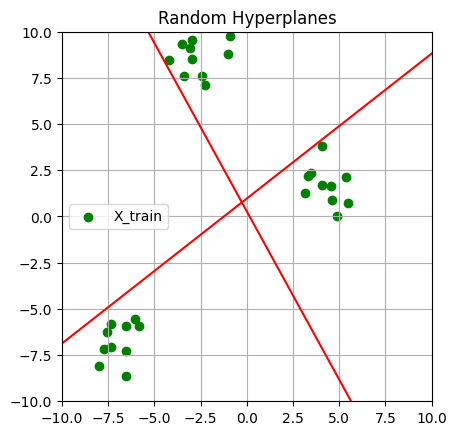

In [ ]:
lsh.plot_hyperplanes()

In [ ]:
def count_lsh(knn, lsh):
    knn = knn[knn[:, 0].argsort()]
    lsh = lsh[lsh[:, 0].argsort()]
    count = 0
    for i in knn:
        if i in lsh:
            count += 1

    return count

In [ ]:
number = count_lsh(knn, lsh_neighbours)
print(number)

10


In [ ]:
array = np.random.randint(low=-10, high=10, size=(6,1))

array = np.squeeze(array)

print(type(array))
print(array.shape)

print(array)

<class 'numpy.ndarray'>
(6,)
[3 5 5 0 2 6]


## Large dataset comparision

In [ ]:
import time

samples = [10, 100, 1000, 10000, 1000000]
dimensions = [2, 4, 6, 8, 20]
time_kdtree_train = []
time_lsh_train = []
time_knn_test = []
time_kdtree_test = []
time_lsh_test = []
k = 10
for i in range(len(samples)):
  X_train, y_train = create_clusters(5, samples[i], dimensions[i], 1)
  x_test = np.random.randint(low=-15, high=15, size=(dimensions[i], 1))
  x_test = np.squeeze(x_test)

  start = time.time()
  y_pred_naive_self = k_nearest_neighbors_with_indices(X_train, x_test, k)
  end = time.time()
  time_knn_test.append(end - start)

  start = time.time()
  root = build_kdtree(X_train)
  end = time.time()
  time_kdtree_train.append(end - start)

  start = time.time()
  y_pred_kd_self = nearest_neighbors_kdtree(root, x_test, k)
  end = time.time()
  time_kdtree_test.append(end - start)

  start = time.time()
  lsh = LSH(X_train, num_planes=5, k = 10)
  index = lsh.build_index()
  end = time.time()
  time_lsh_train.append(end - start)

  start = time.time()
  y_pred_lsh_self = lsh.query(x_test, index)
  end = time.time()
  time_lsh_test.append(end - start)

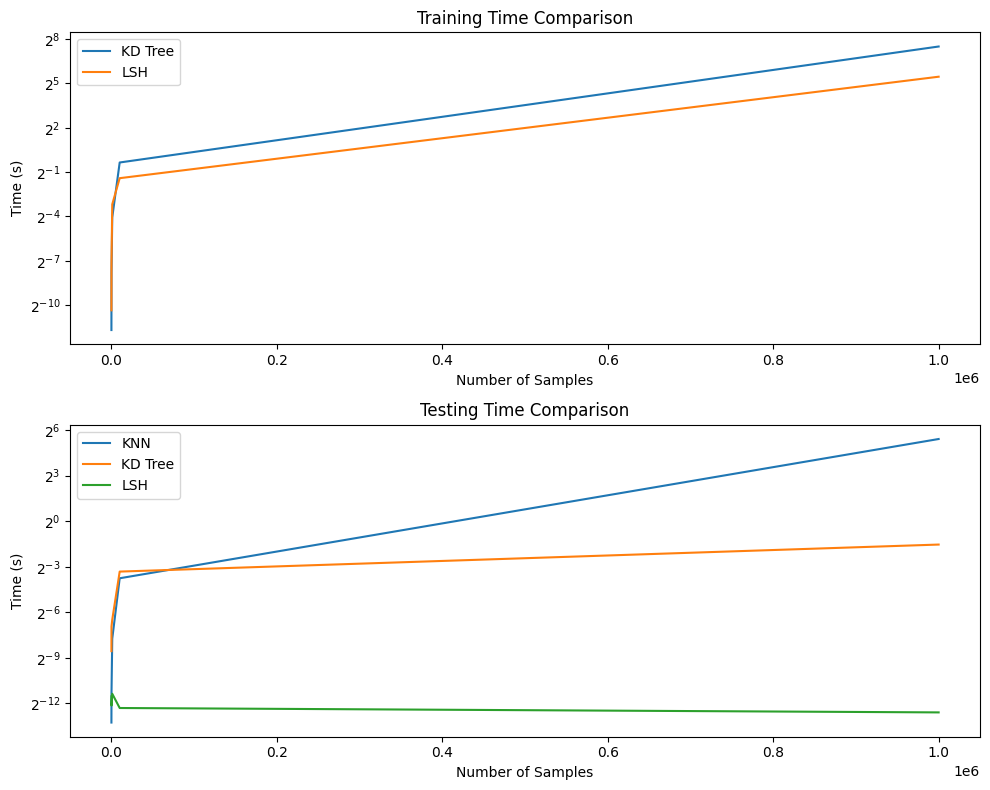

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(samples, time_kdtree_train, label='KD Tree')
plt.plot(samples, time_lsh_train, label='LSH')
plt.xlabel('Number of Samples')
plt.ylabel('Time (s)')
plt.title('Training Time Comparison')
plt.legend()
plt.yscale('log', base=2)  

plt.subplot(2, 1, 2)
plt.plot(samples, time_knn_test, label='KNN')
plt.plot(samples, time_kdtree_test, label='KD Tree')
plt.plot(samples, time_lsh_test, label='LSH')
plt.xlabel('Number of Samples')
plt.ylabel('Time (s)')
plt.title('Testing Time Comparison')
plt.legend()

plt.yscale('log', base=2)  

plt.tight_layout()
plt.show()

**Time complexity**

As KNN algorithm directly finds the K nearest neighbours time required for the training is 0. So, the overall training time is N * D.

For KD tree algorithm, the training time is $N \cdot (logN)^2$ and the testing time is logN.

For LSH algorithm the training time depends is $N \cdot D \cdot P$. While, The testing time depends on the number of sample points that occur in the same region of randomly generated hyperplanes, which is $T \cdot D  +  D \cdot P$

In [ ]:
X_train, y_train = create_clusters(5, 1000000, 20, 1)
x_test = np.random.randint(low=-15, high=15, size=(20, 1))
x_test = np.squeeze(x_test)

root = build_kdtree(X_train)
total_memory_usage = memory_usage_kdtree(root)
print(f"The memory required for implementing kdtree is: {total_memory_usage/1024} Kilobytes")

lsh = LSH(X_train, num_planes=3, k = 10)
index = lsh.build_index()
total_memory_usage_lsh = memory_usage_lsh(lsh)
print(f"The memory required for implementing LSH is: {total_memory_usage_lsh/1024} Kilobytes")

The memory required for implementing kdtree is: 28671.75 Kilobytes
The memory required for implementing LSH is: 781250.55078125 Kilobytes


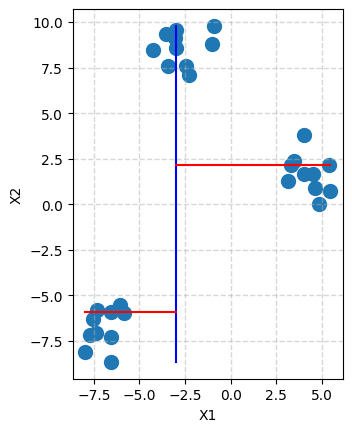

In [ ]:
class Node:
    def __init__(self, point, split_dim, left=None, right=None):
        self.point = point
        self.split_dim = split_dim
        self.left = left
        self.right = right

def build_kd_tree(points, depth=0):
    if len(points) < 10:
        return None

    split_dim = depth % 2
    points.sort(key=lambda x: x[split_dim])

    median_idx = len(points) // 2
    node = Node(points[median_idx], split_dim)
    node.left = build_kd_tree(points[:median_idx], depth + 1)
    node.right = build_kd_tree(points[median_idx + 1:], depth + 1)

    return node

def plot_kd_tree(node, xmin, xmax, ymin, ymax, depth=0):
    if node is None:
        return

    if node.split_dim == 0:  
        plt.plot([node.point[0], node.point[0]], [ymin, ymax], color='b')
    else:  
        plt.plot([xmin, xmax], [node.point[1], node.point[1]], color='r')

    if node.left:
        if node.split_dim == 0:
            plot_kd_tree(node.left, xmin, node.point[0], ymin, ymax, depth + 1)
        else:
            plot_kd_tree(node.left, xmin, xmax, ymin, node.point[1], depth + 1)
    if node.right:
        if node.split_dim == 0:
            plot_kd_tree(node.right, node.point[0], xmax, ymin, ymax, depth + 1)
        else:
            plot_kd_tree(node.right, xmin, xmax, node.point[1], ymax, depth + 1)


points = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])
query_pt = np.array([-2,-7])

root = build_kd_tree(X_train.tolist())  
plt.scatter(X_train[:,0], X_train[:,1], s=100)  
plt.xlabel('X1')
plt.ylabel('X2')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
plot_kd_tree(root, X_train[:,0].min(), X_train[:,0].max(), X_train[:,1].min(), X_train[:,1].max())  # Plot KD-tree partitions
plt.show()


In [ ]:
import math

def calculate_distance(point1, point2):
    distance = math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
    return distance

def find_k_nearest_neighbors(node, query_point, k, nearest_neighbors, depth=0):
    if node is None:
        return

    distance = calculate_distance(node.point, query_point)

    if len(nearest_neighbors) < k:
        nearest_neighbors.append((node.point, distance))
    else:
        max_distance = max(nearest_neighbors, key=lambda x: x[1])[1]
        if distance < max_distance:
            index = nearest_neighbors.index((max_distance, node.point))
            nearest_neighbors[index] = (node.point, distance)

    if query_point[depth % 2] < node.point[depth % 2]:
        first_subtree = node.left
        second_subtree = node.right
    else:
        first_subtree = node.right
        second_subtree = node.left

    find_k_nearest_neighbors(first_subtree, query_point, k, nearest_neighbors, depth + 1)
    split_distance = abs(query_point[depth % 2] - node.point[depth % 2])
    if len(nearest_neighbors) < k or split_distance < max(nearest_neighbors, key=lambda x: x[1])[1]:
        find_k_nearest_neighbors(second_subtree, query_point, k, nearest_neighbors, depth + 1)


In [ ]:
root = build_kd_tree(X_train.tolist())

In [ ]:
print(x_test)

[-2 -7]


In [ ]:
nearest_neighbors = []
find_k_nearest_neighbors(root, x_test, k, nearest_neighbors)
print(k)

for neighbor, distance in nearest_neighbors:
    print("Neighbor:", neighbor, "Distance:", distance)

3
Neighbor: [-2.9726153158652124, 8.548556374628065] Distance: 15.578946879928779
Neighbor: [3.3116927873296707, 2.1700309198098555] Distance: 10.597336803991785
Neighbor: [-6.548363759747706, -5.904564466153587] Distance: 4.678417670516353


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

class Node:
    def __init__(self, point, split_dim, left=None, right=None):
        self.point = point
        self.split_dim = split_dim
        self.left = left
        self.right = right

def build_kd_tree(points, depth=0):
    if len(points) < 1:
        return None

    k = len(points[0])
    split_dim = depth % k
    points = sorted(points, key=lambda x: x[split_dim])
    median_idx = len(points) // 2

    return Node(
        point=points[median_idx],
        split_dim=split_dim,
        left=build_kd_tree(points[:median_idx], depth + 1),
        right=build_kd_tree(points[median_idx + 1:], depth + 1)
    )

def distance(point1, point2):
    return np.sqrt(np.sum(np.square(point1 - point2)))

def nearest_neighbors_from_leaf(node, query_pt, k, neighbors=None):
    if neighbors is None:
        neighbors = []

    if node is None:
        return

    if node.left is None and node.right is None:
        neighbors.append(node.point)
        return neighbors

    split_dim = node.split_dim

    if query_pt[split_dim] < node.point[split_dim]:
        nearest_neighbors_from_leaf(node.left, query_pt, k, neighbors)
    else:
        nearest_neighbors_from_leaf(node.right, query_pt, k, neighbors)
    if abs(query_pt[split_dim] - node.point[split_dim]) < distance(query_pt, neighbors[-1]):
        if query_pt[split_dim] < node.point[split_dim]:
            nearest_neighbors_from_leaf(node.right, query_pt, k, neighbors)
        else:
            nearest_neighbors_from_leaf(node.left, query_pt, k, neighbors)
    return heapq.nsmallest(k, neighbors, key=lambda x: distance(x, query_pt))

points = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])
query_pt = np.array([-2, -7])

root = build_kd_tree(X_train)
nearest_neighbors = nearest_neighbors_from_leaf(root, query_pt, k=10)
nearest_neighbors_sorted = sorted(nearest_neighbors, key=lambda x: distance(x, query_pt), reverse=True)
print("Nearest neighbors:", nearest_neighbors_sorted)


Nearest neighbors: [array([-3.4172217 ,  7.60198243]), array([-2.26723535,  7.10100588]), array([5.37834542, 2.14453797]), array([3.48888526, 2.3488677 ]), array([4.03924015, 1.68147593]), array([4.84874243, 0.01349956]), array([3.16135685, 1.25332548]), array([-7.34026596, -5.82298737]), array([-6.5360089 , -8.64314975]), array([-5.84862767, -5.94882947])]
